In [7]:
import pandas as pd
mpg = pd.read_csv('C:/Users/213/Data/mpg.csv')

<AxesSubplot:ylabel='hwy'>

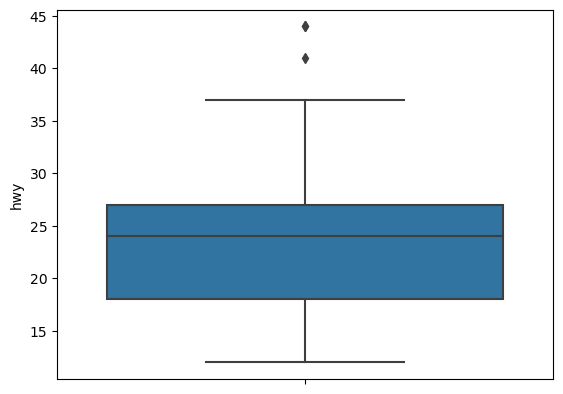

In [8]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [10]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [11]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [12]:
#IQR 구하기
iqr = pct75 - pct25
iqr

9.0

In [13]:
#하한, 상한 구하기
pct25 - 1.5 *iqr

4.5

In [14]:
pct75 + 1.5 * iqr

40.5

In [18]:
# 극단치를 결측 처리함
# 주의 : np.where()의 각 조건을 괄호로 감싸주어야 함
import numpy as np
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5 )| (mpg['hwy'] >40.5),
                       np.nan, mpg['hwy']
                        )

In [19]:
# 결측 처리된 값의 수 확인
mpg['hwy'].isna().sum()

3

In [20]:
#구동방식(drv)에 따라 고속도로 연비(hwy)가 어떻게 달라지는지 확인
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy =('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [23]:
#Lab 7 : 혼자서 해보기
#1. mpg 데이터에서 구동방식(drv)별 도시 연비(cty)를 분석해 봅시다.
#2. mpg 데이터에 이상값과 극단값을 할당합니다.

In [22]:
# [9, 13, 57, 92]행의 drv 값을 k로 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

In [24]:
# [28, 42, 128, 202]행의 도시 연비 값을 각각 [3, 4, 39, 42]로 할당
# 도시 연비 값 [3, 4, 39, 42]은 (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖의
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [25]:
#: drv에 이상치가 있는지 확인
mpg['drv'].value_counts()

f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [27]:
# drv 이상 값 k에 대해 NaN 처리
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']),mpg['drv'], np.nan)

In [28]:
# drv 변수에 이상 값(NaN)이 몇개인지 확인
mpg['drv'].isna().sum()

4

In [29]:
# drv에 따른 자동차 빈도 수 구하기
mpg['drv'].value_counts()

f    106
4    100
r     24
Name: drv, dtype: int64

<AxesSubplot:ylabel='cty'>

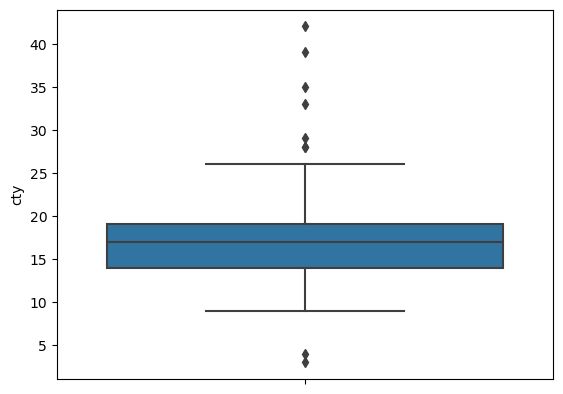

In [30]:
# 도시연비 cty에 이상치가 있는지 확인하기 위해 박스 수염 그래프 그리기
# (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값이 있음을 확인
sns.boxplot(data=mpg, y='cty')

In [31]:
# 25% 값 구하기
pct25 = mpg['cty'].quantile(0.25)
pct25

14.0

In [33]:
# 75% 값 구하기
pct75 = mpg['cty'].quantile(0.75)
pct75

19.0

In [34]:
# iqr 값 구하기
iqr = pct75 - pct25
iqr

5.0

In [36]:
pct25 - 1.5 * iqr

6.5

In [37]:
pct75 + 1.5 * iqr

26.5

In [39]:
# (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값인 경우 NaN 처리
mpg['cty']= np.where( (mpg['cty']<6.5)|(mpg['cty']>26.5),
                      np.nan,mpg['cty'])

<AxesSubplot:ylabel='cty'>

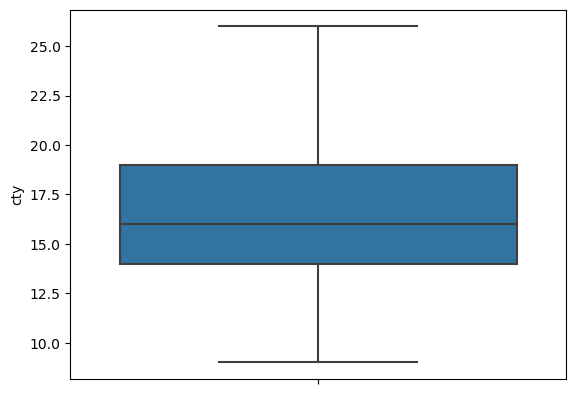

In [40]:
# 도시연비 cty에 대해 박스 수염 그래프 그리기
sns.boxplot(data=mpg, y='cty')


In [43]:
#8주차 08-1 파이썬으로 만들 수 있는 그래프 살펴 보기
import seaborn as sns
sns.set_theme(style="whitegrid")
#style : whitegrid, darkgrid, ticks, white, dark

In [44]:
# Load an example dataset with long-form data
fmri =sns.load_dataset("fmri")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

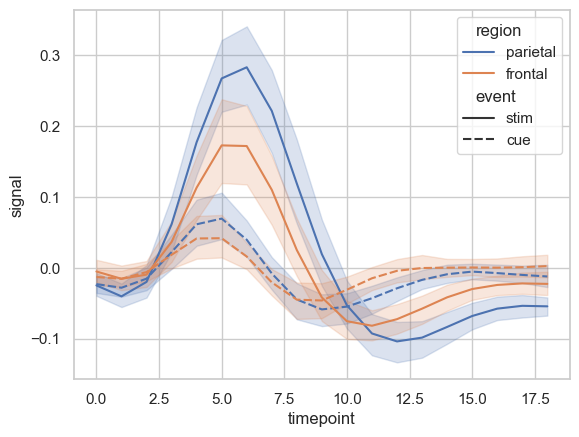

In [45]:
# Plot the responses for different events and 
sns.lineplot( x="timepoint",y="signal",
              hue="region",style='event',
             data=fmri)

[(3.0, 6.0), (10.0, 30.0)]

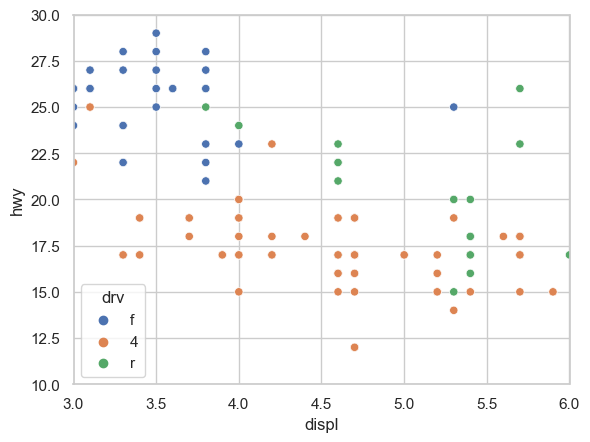

In [47]:
# x축, y축범위 설정
sns.scatterplot(data=mpg, x='displ',y='hwy',hue ='drv').set(xlim = (3,6),ylim = (10,30))

In [52]:
# Lab 1 : 평균 막대 그래프 만들기
# 그룹에 사용하는 컬럼(변수)가 기본적으로 인덱스가 된다.
# 컬럼(변수)을 인덱스로 생성하지 않기 위해서 'as_index=False' 사용
df_mpg = mpg.groupby('drv',as_index =False).agg(mean_hwy = ('hwy','mean'))
df_mpg


,drv,mean_hwy
0,4,19.050000
1,f,27.728155
2,r,20.791667


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

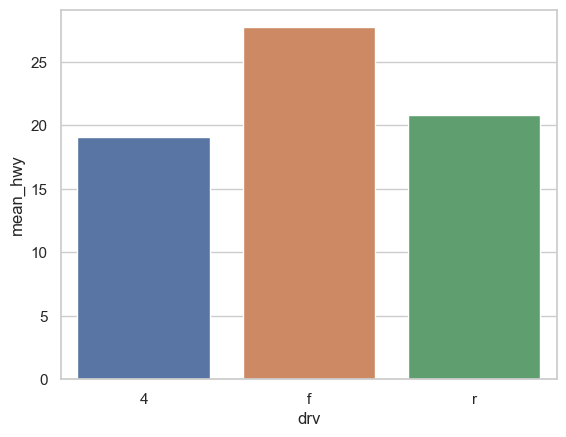

In [53]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [54]:
df_mpg

,drv,mean_hwy
0,4,19.050000
1,f,27.728155
2,r,20.791667


In [55]:
# 크기 순의로 정렬
df_mpg = df_mpg.sort_values('mean_hwy',ascending= False)
df_mpg

,drv,mean_hwy
1,f,27.728155
2,r,20.791667
0,4,19.050000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

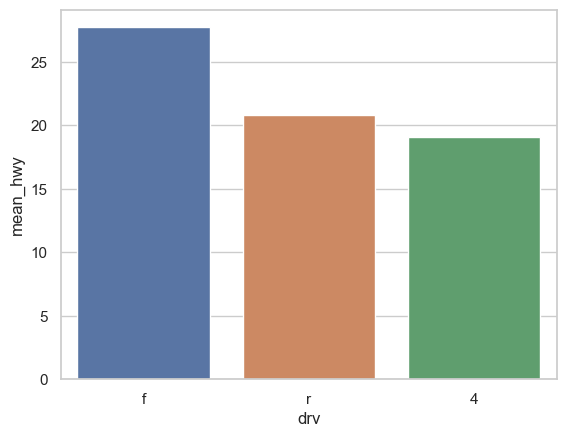

In [57]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [58]:
# Lab 2 : 빈도 막대 그래프 만들기
# 구동방식(drv)별 빈도표 만들기
# groupby를 하면 'drv'로 오름차순 정렬을 해준다.
df_mpg = mpg.groupby('drv', as_index=False).agg(count_drv= ('drv','count'))
df_mpg

,drv,count_drv
0,4,100
1,f,106
2,r,24


<AxesSubplot:xlabel='drv', ylabel='count_drv'>

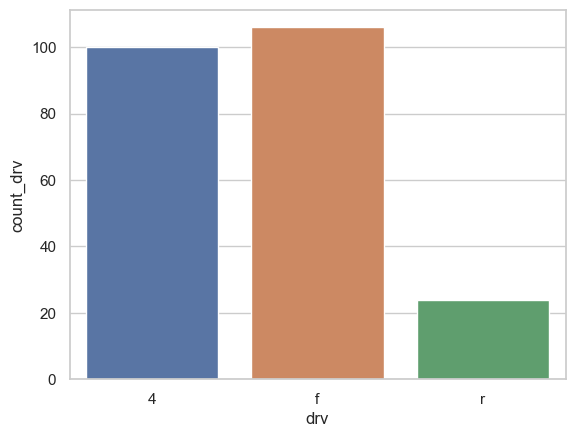

In [60]:
# 구동 방식(drv)별 막대 그래프 만들기
sns.barplot(data=df_mpg,x='drv',y='count_drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

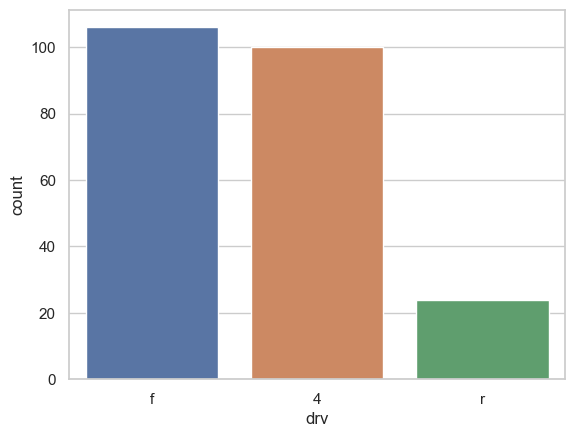

In [61]:
# sns.countplot()으로 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x='drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

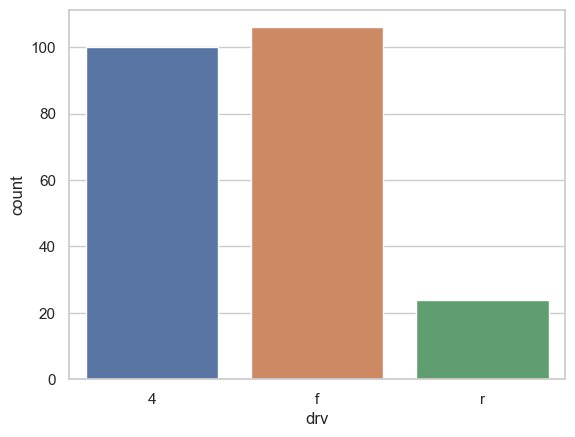

In [62]:
# sns.countplot()으로 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x='drv', order = ['4','f','r'])

In [65]:
mpg[['model']].head(20)

,model
0,a4
1,a4
2,a4
3,a4
4,a4
5,a4
6,a4
7,a4 quattro
8,a4 quattro
9,a4 quattro


In [67]:
mpg['model'].unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [69]:
model_count_mpg=mpg.groupby('model', as_index= False).agg(model_count=('model','count'))
model_count_mpg

,model,model_count
0,4runner 4wd,6
1,a4,7
2,a4 quattro,8
3,a6 quattro,3
4,altima,6
5,c1500 suburban 2wd,5
6,camry,7
7,camry solara,7
8,caravan 2wd,11
9,civic,9


In [70]:
model_count_mpg['model'].unique()

array(['4runner 4wd', 'a4', 'a4 quattro', 'a6 quattro', 'altima',
       'c1500 suburban 2wd', 'camry', 'camry solara', 'caravan 2wd',
       'civic', 'corolla', 'corvette', 'dakota pickup 4wd', 'durango 4wd',
       'expedition 2wd', 'explorer 4wd', 'f150 pickup 4wd',
       'forester awd', 'grand cherokee 4wd', 'grand prix', 'gti',
       'impreza awd', 'jetta', 'k1500 tahoe 4wd',
       'land cruiser wagon 4wd', 'malibu', 'maxima', 'mountaineer 4wd',
       'mustang', 'navigator 2wd', 'new beetle', 'passat',
       'pathfinder 4wd', 'ram 1500 pickup 4wd', 'range rover', 'sonata',
       'tiburon', 'toyota tacoma 4wd'], dtype=object)

In [73]:
#자주 나오는 순서대로 정렬해준다.
mpg['model'].value_counts()

caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
dakota pickup 4wd          9
mustang                    9
impreza awd                8
a4 quattro                 8
grand cherokee 4wd         8
a4                         7
toyota tacoma 4wd          7
camry solara               7
camry                      7
tiburon                    7
sonata                     7
passat                     7
f150 pickup 4wd            7
durango 4wd                7
explorer 4wd               6
new beetle                 6
altima                     6
4runner 4wd                6
forester awd               6
gti                        5
c1500 suburban 2wd         5
corolla                    5
corvette                   5
malibu                     5
grand prix                 5
k1500 tahoe 4wd            4
pathfinder 4wd             4
mountaineer 4wd            4
range rover                4
maxima                     3
navigator 2wd 

In [72]:
mpg['model'].value_counts().index

Index(['caravan 2wd', 'ram 1500 pickup 4wd', 'civic', 'jetta',
       'dakota pickup 4wd', 'mustang', 'impreza awd', 'a4 quattro',
       'grand cherokee 4wd', 'a4', 'toyota tacoma 4wd', 'camry solara',
       'camry', 'tiburon', 'sonata', 'passat', 'f150 pickup 4wd',
       'durango 4wd', 'explorer 4wd', 'new beetle', 'altima', '4runner 4wd',
       'forester awd', 'gti', 'c1500 suburban 2wd', 'corolla', 'corvette',
       'malibu', 'grand prix', 'k1500 tahoe 4wd', 'pathfinder 4wd',
       'mountaineer 4wd', 'range rover', 'maxima', 'navigator 2wd',
       'a6 quattro', 'expedition 2wd', 'land cruiser wagon 4wd'],
      dtype='object')

<AxesSubplot:xlabel='model', ylabel='count'>

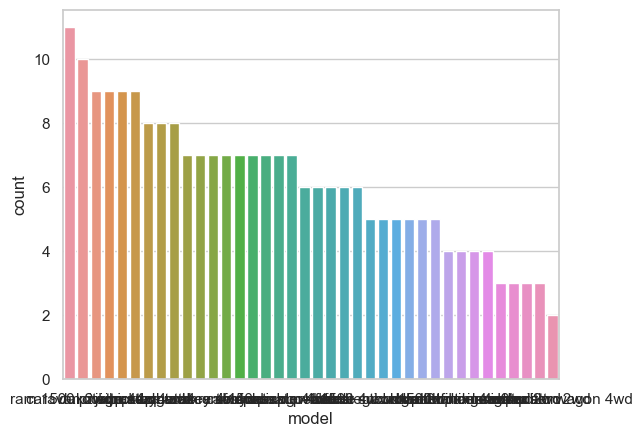

In [74]:
# sns.countplot()으로 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x='model', order =mpg['model'].value_counts().index)

<AxesSubplot:xlabel='model', ylabel='count'>

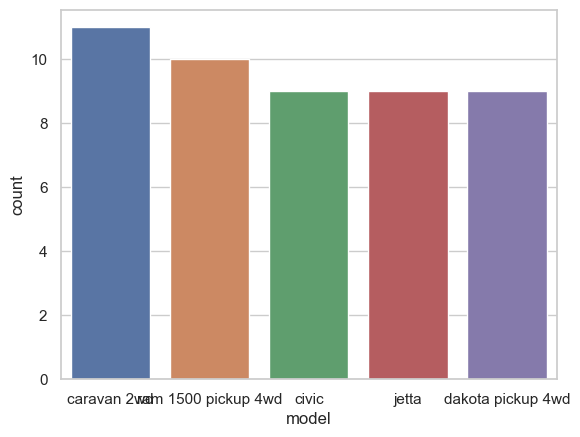

In [75]:
sns.countplot(data = mpg, x='model', order =mpg['model'].value_counts().head(5).index)

In [77]:
# 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기
economics = pd.read_csv('C:/Users/213/Data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [78]:
# lineplot()을 이용하여 선 그래프 작성
# x축 date에 여러 날짜가 겹쳐 출력됨
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='unemploy'>

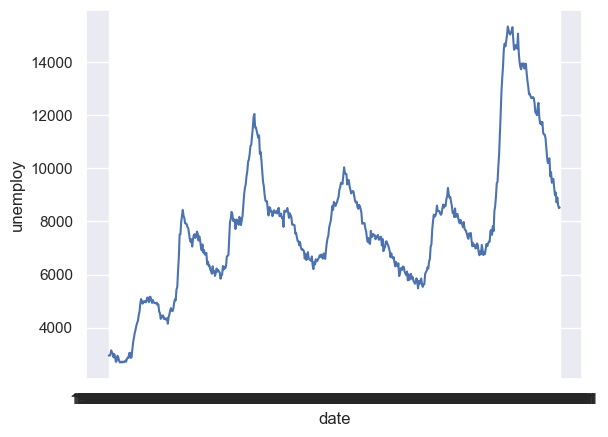

In [80]:
#그래프 스타일
#style : whitegrid, darkgrid, ticks, white, dark
sns.set_style('darkgrid')
sns.lineplot(data = economics, x = 'date', y='unemploy')

In [81]:
# x 축에 연도 표시
economics['date2'] = pd.to_datetime(economics['date'])

In [82]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [83]:
economics[['date','date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [84]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [85]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [86]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [88]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

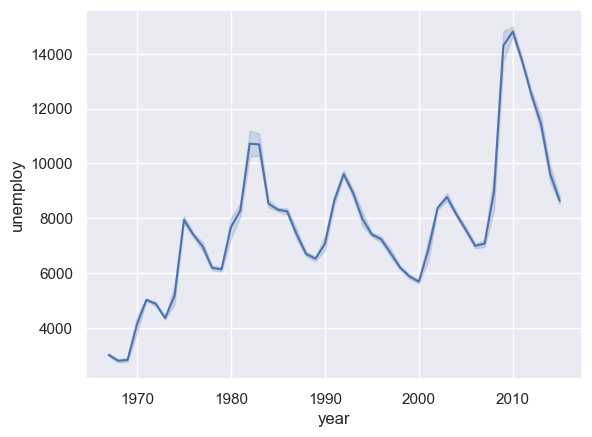

In [90]:
# x 축에 연도 표기
# 선은 추정 회귀선을 의미, 그림자는 신뢰구간을 표시 95% (sampling을 통해서 얻어내는 값
sns.lineplot(data = economics, x='year', y='unemploy')

In [91]:
# query함수는 정제된 데이터에서 특정 조건을 만족하는 결과를 추출
economics.query('year == 1982')['unemploy'].to_frame().describe()

,unemploy
count,12.000000
mean,10714.916667
std,856.415942
min,9397.000000
25%,10156.750000
50%,10693.500000
75%,11295.000000
max,12051.000000


<AxesSubplot:xlabel='year', ylabel='unemploy'>

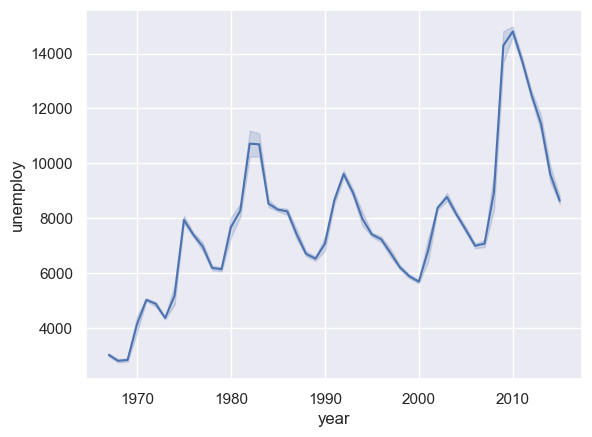

In [94]:
# x 축에 연도 표기 (선 위 아래 표시 면적은 신뢰구간, 오차가 존재할수 있는 구간을 표시
# ci = None은 deprecated 되었다. 대신 errorbar=None을 작성
#sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar=None)